<a href="https://colab.research.google.com/github/lesanpi/clasificacion-spam-ham/blob/master/clasificacion_spam_ham_lesanpi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Clasificacion Spam o Ham.**

# **Importamos el dataset, pandas, numpy, nltk, random**

Tambien descargamos punkt, el tokenizador.

In [1]:
!git clone https://github.com/pachocamacho1990/datasets

Cloning into 'datasets'...
remote: Enumerating objects: 39, done.
remote: Total 39 (delta 0), reused 0 (delta 0), pack-reused 39
Unpacking objects: 100% (39/39), done.


In [3]:
import pandas as pd
import numpy as np
import nltk, random
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [4]:
df = pd.read_csv('datasets/email/csv/spam-apache.csv', names = ['clase','contenido'])
df['tokens'] = df['contenido'].apply(lambda x: word_tokenize(x))
df.head()

,clase,contenido,tokens
0,-1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...","[<, !, DOCTYPE, HTML, PUBLIC, ``, -//W3C//DTD,..."
1,1,> Russell Turpin:\n> > That depends on how the...,"[>, Russell, Turpin, :, >, >, That, depends, o..."
2,-1,Help wanted. We are a 14 year old fortune 500...,"[Help, wanted, ., We, are, a, 14, year, old, f..."
3,-1,Request A Free No Obligation Consultation!\nAc...,"[Request, A, Free, No, Obligation, Consultatio..."
4,1,Is there a way to look for a particular file o...,"[Is, there, a, way, to, look, for, a, particul..."


Leemos el dataset, y analizamos la clase spam (-1) y sus tokens. Podemos ver cuales son las palabras mas comunes que pertenezcan a la clase -1.

In [7]:
df_spam = df[df["clase"] == -1]
df_spam.head()

,clase,contenido,tokens
0,-1,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...","[<, !, DOCTYPE, HTML, PUBLIC, ``, -//W3C//DTD,..."
2,-1,Help wanted. We are a 14 year old fortune 500...,"[Help, wanted, ., We, are, a, 14, year, old, f..."
3,-1,Request A Free No Obligation Consultation!\nAc...,"[Request, A, Free, No, Obligation, Consultatio..."
10,-1,>\n>“µ×è¹µÑÇ ¡ÑºâÅ¡¸ØÃ¡Ô¨º¹ÍÔ¹àµÍÃìà¹çµ” \n>àµ...,"[>, >, “, µ×è¹µÑÇ, ¡ÑºâÅ¡¸ØÃ¡Ô¨º¹ÍÔ¹àµÍÃìà¹çµ,..."
11,-1,==============================================...,[=============================================...


Podemos ver las palabras y con que frecuencia aparecen en cada dataset.

In [ ]:
spam_words = nltk.FreqDist([w for tokenlist in df_spam['tokens'].values for w in tokenlist])
top_spam_words = spam_words.most_common(200)
top_spam_words[:20]

In [ ]:
all_words = nltk.FreqDist([w for tokenlist in df['tokens'].values for w in tokenlist])
top_words = all_words.most_common(200)
top_words[:20]

Podemos ver la lista de palabras mas comunes del dataset de spam.

In [ ]:
spam_words_list = [w for (w, c) in top_spam_words]
top_words_list = [tw for (tw, cw) in top_words]

spam_words_list

Podemos ver si las clases estan balanceadas utilizando hist. 

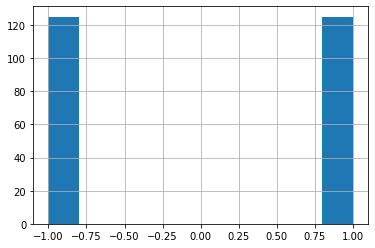

In [30]:
df['clase'].hist()

In [69]:
len(spam_words_list)

200

# **Atributos**

En el ejercicio, podemos ver que usando las 200 palabras mas comunes del dataset tenia un rendimiento muy bajo. Ahora utilizamos las palabras mas comunes de los clasificados como spam y tambien indicamos otro campo que es la longitud del texto.

In [44]:
def document_features(document):
    document_words = set(document)
    features = {}
    features['longitud'] = len(document)
    #for word in top_words:
    for word in spam_words_list:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [80]:
fset = [(document_features(texto), clase) for texto, clase in zip(df['tokens'].values, df['clase'].values)]
random.shuffle(fset)
print(len(fset))
train, test = fset[:200], fset[100:]

250


# **Entrenamiento y Accuracy**

Podemos ver que ahora utilizando los atributos que refieren a las palabras mas comunes que son spam aumentara al acierto, tambien agregando otro dato: La longitud del texto. 

**Resultado: 0.96.**

In [81]:
classifier = nltk.NaiveBayesClassifier.train(train)

In [82]:
print(nltk.classify.accuracy(classifier, test))

0.96
